In [1]:
from PIL import Image
import requests
import os
import json
import matplotlib.pyplot as plt
import torch

from transformers import CLIPProcessor, CLIPModel

In [6]:
search_file = "searches/full_100_2022-03-21_17_18_01.json"
image_dir = "images/"

In [3]:
def get_titles(search):
    titles = []
    for post_id, post in search.items():
        titles.append(post["name"])
    return titles

def get_ids(search):
    ids = []
    for post_id in search:
        ids.append(post_id)
    return ids

def get_images(search):
    images = []
    for post_id in search:
        filename = os.path.join(image_dir, post_id + ".jpg")
        if os.path.exists(filename):
            # read image with PIL
            image = Image.open(filename)
            images.append(image)
    return images

In [10]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [7]:
# read search_file
with open(search_file, "r") as f:
    search = json.load(f)

ids = get_ids(search)
titles = get_titles(search)
images = get_images(search)

In [12]:
def get_logits(text, images):
    inputs = processor(text=text, images=images, return_tensors="pt", padding=True)
    # inputs = inputs.cuda()
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
    logits_per_image = logits_per_image.detach().cpu().numpy()
    return logits_per_image

In [13]:
logits = get_logits(titles, images)

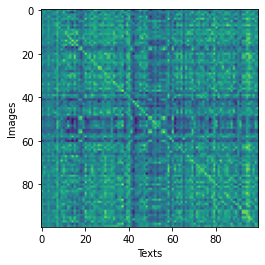

In [15]:
plt.imshow(logits)
# label y axis with "Images"
plt.ylabel("Images")
# label x axis as "Texts"
plt.xlabel("Texts")
plt.show()
# print all the post urls
# for i, post_id in enumerate(search):
#     print(i, search[post_id]["url"])


In [16]:
query = "A beautiful living room"
probs = get_logits(query, images).squeeze()
sorted_inds = probs.argsort()[::-1]


=====0=====
✅ NEW Sofa for sale ✅
https://westernmass.craigslist.org/fuo/d/holyoke-new-sofa-for-sale/7454744304.html


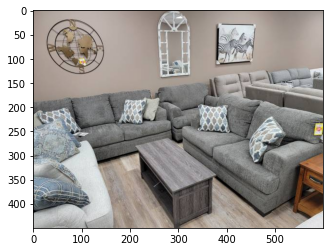

=====1=====
👉 Sectional Brand NEW!!! 👈
https://westernmass.craigslist.org/fuo/d/holyoke-sectional-brand-new/7454954121.html


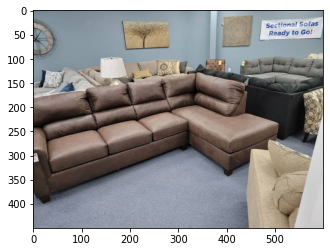

=====2=====
Moving Selling family room pieces
https://westernmass.craigslist.org/fuo/d/framingham-moving-selling-family-room/7458560223.html


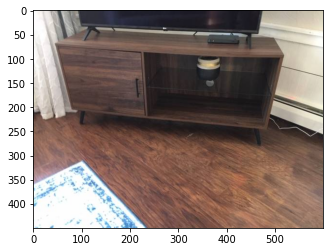

=====3=====
New  Sofa Twilight
https://westernmass.craigslist.org/fuo/d/chicopee-new-sofa-twilight/7459304698.html


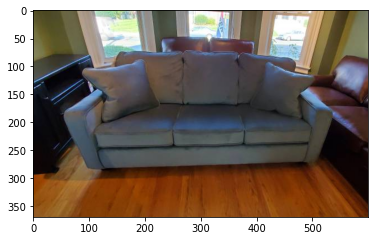

=====4=====
ELECTIC RECLINER BY BEST CHAIR
https://westernmass.craigslist.org/fuo/d/chicopee-electic-recliner-by-best-chair/7460798398.html


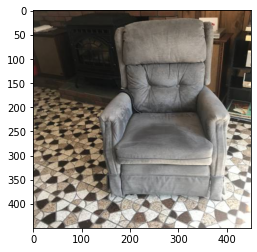

=====5=====
💠 Power LIFT Recliners 💠
https://westernmass.craigslist.org/fuo/d/holyoke-power-lift-recliners/7454771071.html


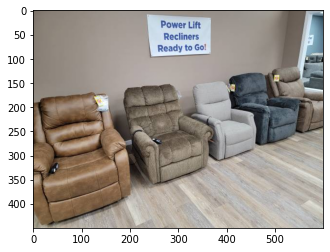

=====6=====
Loveseat
https://westernmass.craigslist.org/fuo/d/hadley-loveseat/7460750432.html


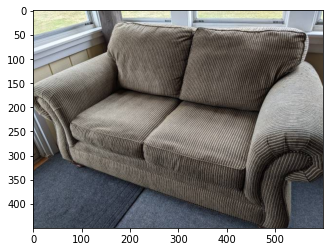

=====7=====
Love seat sofa
https://westernmass.craigslist.org/fuo/d/granby-love-seat-sofa/7460779546.html


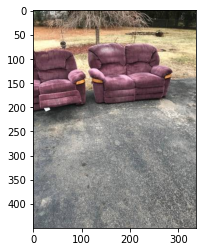

=====8=====
Solid Wood Corner Hutch
https://westernmass.craigslist.org/fuo/d/blandford-solid-wood-corner-hutch/7457570284.html


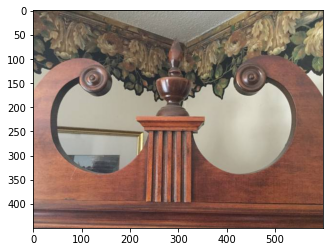

=====9=====
SEAT/STOOL WOOD with RUSH SEAT
https://westernmass.craigslist.org/fuo/d/dalton-seat-stool-wood-with-rush-seat/7450699129.html


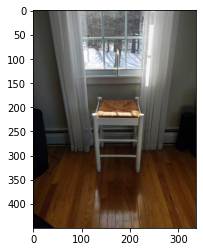

In [17]:
for i in range(10):
    image = images[sorted_inds[i]]
    post_id = ids[sorted_inds[i]]
    post = search[post_id]
    print(f"====={i}=====")
    print(post["name"])
    print(post["url"])
    # show the image with the highest probability
    plt.imshow(image)
    plt.show()


In [ ]:
inputs = processor(text=titles[:10], images=images[:10], return_tensors="pt", padding=True)
outputs = model(**inputs)